# Corrélation

## Mesures journalières : 2018-2019

-----------------------------

- **Auteur** : Tarik Boumaza
- **Date** : 21 Mai 2021

-----------------------------

Imports

In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats

## 1. Data

### 1.1 Pollution

#### Indicateur

In [2]:
df_pollution = {'no': 0, 'no2': 0, 'o3': 0, 'pm2,5': 0, 'pm10': 0}
pollution_filepath = '../../data/pollution/mesures/'

def read_pollution_file(polluant):
    filename = pollution_filepath + 'indicateur/' + polluant + '_indicateur.csv'
    temp_df = pd.read_csv(filename, sep=";")
    nom_lignes = []
    data = []
    for i in range(len(temp_df)):
        nom_lignes.append(temp_df.iloc[i,0])
        data.append(temp_df['indicateur'][i])
    ar = numpy.array(data)
    temp_df = pd.DataFrame(ar, index = nom_lignes, columns = ['indicateur'])
    return temp_df

In [3]:
for cle, valeur in df_pollution.items():
    df_pollution[cle] = read_pollution_file(cle)

##### Statistiques

Pour chacun des polluants, calcul des indicateurs stastistiques suivants:
- moyenne ('moyenne')
- 1er quartile ('q1')
- médiane ('q2')
- 3ème quartile ('q3')
- dernier décile ('d10')

In [4]:
filename = '../../data/pollution/stats.csv'
df_stats = pd.read_csv(filename, sep=";")

nom_lignes = []
data = []
for i in range(len(df_stats)):
    temp = []
    j = 1
    nom_lignes.append(df_stats.iloc[i,0])
    while (j < len(df_stats.iloc[i])):
        temp.append(df_stats.iloc[i,j])
        j = j + 1
    data.append(temp)
ar = numpy.array(data)
df_stats = pd.DataFrame(ar, index = nom_lignes, columns = ['moyenne','q1','mediane','q3','d10'])

In [5]:
df_stats

,moyenne,q1,mediane,q3,d10
no,29.18,11.67,19.57,34.41,62.62
no2,32.59,22.51,30.74,40.48,50.45
o3,51.88,34.40,51.40,67.86,81.91
"pm2,5",19.68,10.65,16.10,24.44,36.38
pm10,25.10,15.70,21.65,30.48,42.37


In [6]:
def selection_date(date_debut, date_fin):
    for cle,valeur in df_pollution.items():
        df_pollution[cle] = valeur.loc[date_debut:date_fin]

In [7]:
selection_date('01/01/2018', '31/12/2019')

----------------------------------------

### 1.2. Mortalité

In [8]:
mortalite_filepath = '../../data/mortalite/journaliers_2018-2019/quotidienne/'

df_mortalite = {'2018': 0, '2019': 0}

def read_mortalite_file(annee):
    filename = mortalite_filepath + annee + '_quotidienne.csv'
    temp_df = pd.read_csv(filename, sep=";")
    nom_lignes = []
    data = []
    for i in range(len(temp_df)):
        nom_lignes.append(temp_df.iloc[i,0])
        data.append(temp_df['nb_deces'][i])
    ar = numpy.array(data)
    temp_df = pd.DataFrame(ar, index = nom_lignes, columns = ['nb_deces'])
    return temp_df


def plot_mortalite():
    plt.clf()
    fig, ax = plt.subplots()  # Create a figure and an axes.
    x = []
    y = [] 
    for c, v in df_mortalite.items():
        for i in range(len(v)):
            x.append(df_mortalite[c].index[i])
            y.append(v['nb_deces'][i])
    ax.bar(x, y,label='mortalite-quotidienne')
    ax.set_xlabel('date')  # Add an x-label to the axes.
    ax.set_ylabel('nombre décès')  # Add a y-label to the axes.
    titre = 'Mortalité journalière Rhône, 2018-2019'
    ax.set_title(titre)  # Add a title to the axes.
    ax.legend()  # Add a legend.
    plt.savefig("sorties/mortalite-journaliere.png")
    plt.show()

In [9]:
for cle, valeur in df_mortalite.items():
    df_mortalite[cle] = read_mortalite_file(cle)

<Figure size 432x288 with 0 Axes>

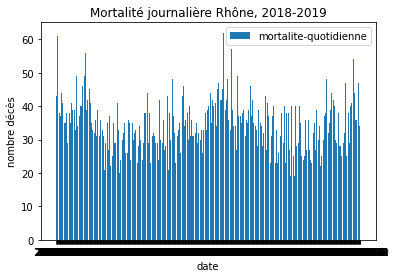

In [10]:
plot_mortalite()

### 3. Corrélation

In [11]:
filename = mortalite_filepath + '2018' + '_quotidienne.csv'
temp_df = pd.read_csv(filename, sep=";")
nom_lignes = []
data = []
for i in range(len(temp_df)):
    nom_lignes.append(temp_df.iloc[i,0])
    data.append(temp_df['nb_deces'][i])

filename = mortalite_filepath + '2019' + '_quotidienne.csv'
temp_df = pd.read_csv(filename, sep=";")
for i in range(len(temp_df)):
    nom_lignes.append(temp_df.iloc[i,0])
    data.append(temp_df['nb_deces'][i])
    
ar = numpy.array(data)
df_test_correlation = pd.DataFrame(ar, index = nom_lignes, columns = ['nb_deces'])

In [12]:
data = []
for p, v in df_pollution.items():
    temp = []
    for i in range(len(v['indicateur'])):
        temp.append(v['indicateur'][i])
    df_test_correlation[p] = temp

In [13]:
df_test_correlation

,nb_deces,no,no2,o3,"pm2,5",pm10
2018-1-1,44,19.52,30.27,56.39,4.71,7.67
2018-1-2,43,25.22,40.13,40.77,7.12,13.06
2018-1-3,44,19.68,32.60,50.93,5.48,9.52
2018-1-4,61,72.36,52.28,37.53,7.39,9.59
2018-1-5,41,37.56,41.52,32.24,6.62,9.48
...,...,...,...,...,...,...
2019-12-27,47,36.62,44.94,40.28,15.84,17.70
2019-12-28,46,14.62,24.61,36.53,9.39,11.14
2019-12-29,34,16.10,26.67,25.61,19.55,21.54
2019-12-30,42,43.54,38.84,16.43,32.84,36.76


In [14]:
df_test_correlation.corr(method="spearman")

,nb_deces,no,no2,o3,"pm2,5",pm10
nb_deces,1.000000,0.188265,0.197158,-0.219550,0.150273,0.106504
no,0.188265,1.000000,0.841666,-0.498466,0.485049,0.519360
no2,0.197158,0.841666,1.000000,-0.306031,0.539099,0.565701
o3,-0.219550,-0.498466,-0.306031,1.000000,-0.266129,-0.128438
"pm2,5",0.150273,0.485049,0.539099,-0.266129,1.000000,0.894096
pm10,0.106504,0.519360,0.565701,-0.128438,0.894096,1.000000


In [15]:
for cle, valeur in df_mortalite.items():
    df_mortalite[cle] = read_mortalite_file(cle)

In [16]:
data = {}
j = 0
for cle_m, valeur_m in df_mortalite.items():
    for i in range(len(valeur_m.index)):
        d = valeur_m.index[i]
        data[d] = {}
        data[d]['nb_deces'] = valeur_m.loc[valeur_m.index[i]].iloc[0]
        for cle_p, valeur_p in df_pollution.items():
            data[d][cle_p] = valeur_p['indicateur'][j]
        j = j + 1

In [17]:
mortalite = []
for c, v in df_mortalite.items():
    for i in range(len(v)):
        mortalite.append(v['nb_deces'][i])
    
#pour le polluant, je ne sélectionne que les tuples avec indicateur > seuil (seuil paramètre de la fonction)
def select_seuil(polluant, seuil, decalage = 0):
    nb_deces = []
    indicateur_seuil = []
    for i in range(len(df_pollution[polluant]) - decalage):
        if (df_pollution[polluant].iloc[i]['indicateur'] > seuil):
            nb_deces.append(mortalite[i + decalage])
            indicateur_seuil.append(df_pollution[polluant].iloc[i]['indicateur'])
    return indicateur_seuil, nb_deces


def moyenne_glissante(tab, n):
    if not(n < len(tab)):
        exit()
    temp = (tab[0] + tab[1])/2
    moy = [float(tab[0]), float(temp)]
    i = 2
    while(i < n):
        temp = ((temp*(i)) + tab[i]) / (i+1)
        moy.append(temp)
        i = i + 1
    while(i < len(tab)):
        temp = temp - tab[i - n]/n + tab[i]/n
        moy.append(temp)
        i = i + 1
    return moy


def seuil_moy_glissante(polluant, nb_jours, seuil):
    donnees_moy = moyenne_glissante(df_pollution[polluant]['indicateur'], nb_jours)
    seuil_indicateur = []
    nb_deces = []

    for i in range(len(donnees_moy)):
        if (donnees_moy[i] > seuil):
            seuil_indicateur.append(donnees_moy[i])
            nb_deces.append(mortalite[i])
    return seuil_indicateur, nb_deces


def select_seuil_cumul(polluant, seuil, nb_jours = 4):
    indicateur_seuil = []
    nb_deces = []
    i = 0
    for c, v in data.items():
        if (v[polluant] > seuil):
            indicateur_seuil.append(v[polluant])
            nb_deces.append(mortalite[i])
            n = 1
            while(n < nb_jours):
                if ((i + n) < len(mortalite)): 
                    nb_deces[len(nb_deces)  - 1] = nb_deces[len(nb_deces) - 1] + mortalite[i + n]
                else:
                    nb_deces[len(nb_deces)  - 1] = nb_deces[len(nb_deces) - 1] + mortalite[len(mortalite) - 1]
                n = n + 1
        i = i + 1
    return indicateur_seuil, nb_deces

In [18]:
def select_seuil_cumul(polluant, seuil, nb_jours = 4):
    tab_pollution = []
    for c, v in data.items():
        tab_pollution.append(v[polluant])
    
    indicateur_seuil = []
    nb_deces = []
    i = 0
    
    for i in range(len(tab_pollution)):
        if (tab_pollution[i] > seuil):
            indicateur_temp = 0.0
            mortalite_temp = 0.0
            j = 0
            while((i + j) < len(tab_pollution) and (j < nb_jours)):
                indicateur_temp = indicateur_temp + tab_pollution[i+j]
                mortalite_temp = mortalite_temp + mortalite[i+j]
                j = j + 1
            indicateur_seuil.append(indicateur_temp/nb_jours)
            nb_deces.append(mortalite_temp/nb_jours)
    return indicateur_seuil, nb_deces


def seuil_moy_glissante(polluant, seuil, nb_jours = 4):
    tab_pollution = []
    for c, v in data.items():
        tab_pollution.append(v[polluant])
    tab_pollution = moyenne_glissante(tab_pollution,nb_jours)
    tab_mortalite = moyenne_glissante(mortalite,nb_jours)
    
    indicateur_seuil = []
    nb_deces = []
    i = 0
    
    for i in range(len(tab_pollution)):
        if (tab_pollution[i] > seuil):
            indicateur_temp = 0.0
            mortalite_temp = 0.0
            j = 0
            while((i + j) < len(tab_pollution) and j < nb_jours):
                indicateur_temp = indicateur_temp + tab_pollution[i+j]
                mortalite_temp = mortalite_temp + tab_mortalite[i+j]
                j = j + 1
            indicateur_seuil.append(round(indicateur_temp/nb_jours,2))
            nb_deces.append(round(mortalite_temp/nb_jours,2))
    return indicateur_seuil, nb_deces

In [19]:
def plot_pollution_mortalite(polluant, nb_jours = 7):
    plt.clf()
    x = moyenne_glissante(df_pollution[polluant]['indicateur'], nb_jours)
    y = mortalite        
    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.scatter(x, y, label='point')
    ax.set_xlabel('indicateur pollution')  # Add an x-label to the axes.
    ax.set_ylabel('nombre décès')  # Add a y-label to the axes.
    titre = 'indicateur de pollution en moyenne glissante \'' + polluant + ' vs mortalité\'' 
    ax.set_title(titre)  # Add a title to the axes.
    ax.legend()  # Add a legend.
    plt.show()
    
    
def plot_pollution_mortalite_seuil(polluant, seuil, decalage = 0):
    plt.clf()
    fig, ax = plt.subplots()  # Create a figure and an axes.
    x,y = select_seuil(polluant, seuil, decalage)
    ax.scatter(x, y, label='point')
    ax.set_xlabel('indicateur pollution')  # Add an x-label to the axes.
    ax.set_ylabel('nombre décès')  # Add a y-label to the axes.
    titre = 'indicateur de pollution (seuil) \'' + polluant + ' vs mortalité\'' 
    ax.set_title(titre)  # Add a title to the axes.
    ax.legend()  # Add a legend.
    plt.show()
    
    
def plot_seuil_moy_glissante(polluant, seuil, nb_jours = 5):
    plt.clf()
    fig, ax = plt.subplots()  # Create a figure and an axes.
    x, y = seuil_moy_glissante(polluant, seuil, nb_jours)
    #print(scipy.stats.spearmanr(x, y))
    ax.scatter(x, y, label='(pollution,nb_deces)')
    ax.set_xlabel('indicateur pollution')  # Add an x-label to the axes.
    ax.set_ylabel('nombre décès')  # Add a y-label to the axes.
    titre = 'seuil polluant dépassé en moy glissante \'' + polluant + ' vs mortalité' 
    ax.set_title(titre)  # Add a title to the axes.
    ax.legend()  # Add a legend.
    plt.show()
    
    
def plot_select_seuil_cumul(polluant, seuil, nb_jours = 4):
    plt.clf()
    fig, ax = plt.subplots()  # Create a figure and an axes.
    x,y = select_seuil_cumul(polluant, seuil, nb_jours)
    #print(scipy.stats.spearmanr(x, y))
    ax.scatter(x, y, label='point')
    ax.set_xlabel('indicateur pollution')  # Add an x-label to the axes.
    ax.set_ylabel('nombre décès')  # Add a y-label to the axes.
    titre = 'indicateur de pollution \'' + polluant + ' vs cumulée sur \'' + str(nb_jours) 
    ax.set_title(titre)  # Add a title to the axes.
    ax.legend()  # Add a legend.
    plt.show()

In [20]:
def test_correlation(polluant, seuil, nb_jours, donnees_min = 10, fct='select_seuil'):
    params = {'r':0, 'p':0, 'nb_donnees':0, 'x':0, 'y':0}
    if (fct=='select_seuil'):
        x,y = select_seuil(polluant, seuil, nb_jours)
    elif (fct=='seuil_moy_glissante'):
        x,y = seuil_moy_glissante(polluant, nb_jours)
    elif (fct=='select_seuil_cumul'):
        x,y = select_seuil_cumul(polluant, seuil, nb_jours)
    else:
        exit()
    if (len(x) > donnees_min):
        r,p = scipy.stats.spearmanr(x, y)
        if (params['r'] < r and p < 0.05):
            params['r'] = r
            params['p'] = p
            params['nb_donnees'] = len(x)
            params['x'] = x
            params['y'] = y
    return params

In [21]:
def seuil_moy_decalage(polluant, seuil, nb_jours = 4):
    tab_pollution = []
    indicateur_seuil = []
    nb_deces = []
    
    for c, v in data.items():
        tab_pollution.append(v[polluant])
    tab_pollution = moyenne_glissante(tab_pollution,nb_jours)
    tab_mortalite = moyenne_glissante(mortalite,nb_jours)
    
    for i in range(nb_jours):
        del tab_pollution[(len(tab_pollution)) - i - 1]
        
    for i in range(len(tab_pollution)):
        if (tab_pollution[i] > seuil):
            indicateur_seuil.append(round(tab_pollution[i],2))
            nb_deces.append(round(tab_mortalite[i + nb_jours],2))
    return indicateur_seuil, nb_deces

def plot_seuil_moy_decalage(polluant, seuil, nb_jours = 4):
    x,y = seuil_moy_decalage(polluant, seuil, nb_jours)
    r, p = scipy.stats.spearmanr(x, y)
    if ((p < 0.05) and (r > 0.5) and (len(x) > 15)):
        print(polluant)
        print(seuil)
        print(nb_jours)
        print(len(x))
        print(scipy.stats.spearmanr(x, y))
        plt.clf()
        fig, ax = plt.subplots()  # Create a figure and an axes.
        ax.scatter(x, y, label='point')
        ax.set_xlabel('indicateur pollution')  # Add an x-label to the axes.
        ax.set_ylabel('nombre décès')  # Add a y-label to the axes.
        titre = 'indicateur de pollution \'' + polluant + ' vs cumulée sur \'' + str(nb_jours) 
        ax.set_title(titre)  # Add a title to the axes.
        ax.legend()  # Add a legend.
        plt.show()

In [22]:
def moyenne(tab):
    moy = 0.0
    for i in range(len(tab)):
        moy = moy + tab[i]
    return (moy/len(tab))

def linearisation_moindres_carres(x,y, polluant, draw=True):
    if (len(x) != len(y)):
        exit(1)
    x_barre = moyenne(x)
    y_barre = moyenne(y)
    num_a = 0.0
    denum_a = 0.0
    for i in range(len(x)):
        num_a = num_a + ((x[i] - x_barre)*(y[i] - y_barre))
        denum_a = denum_a + ((x[i] - x_barre)*(x[i] - x_barre))
    a = num_a / denum_a
    b = y_barre - (a * x_barre)
    y_prime = []
    
    print(a)
    print(b)
    for i in range(len(x)):
        y_prime.append(round((a*x[i])+b,2))
        
    if draw:
        plt.clf()
        # Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
        fig, ax = plt.subplots()  # Create a figure and an axes.
        ax.plot(x, y_prime, color='black', linewidth=2, label = 'linérisation')
        ax.scatter(x,y, s=8, label='point')
        ax.set_xlabel('mesure ' + polluant)  # Add an x-label to the axes.
        ax.set_ylabel('nombre décès')  # Add a y-label to the axes.
        titre = 'Linéarisation moindres carrés pour ' + polluant 
        ax.set_title(titre)  # Add a title to the axes.
        ax.legend()  # Add a legend.
        plt.savefig("sorties/linearisation_" + polluant + ".png")
        plt.show()
    
    return x, y_prime

0.14358675433544765
31.220417371835634


<Figure size 432x288 with 0 Axes>

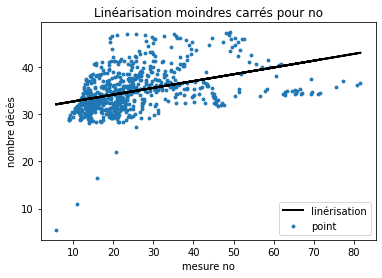

([28.11,
  30.4,
  32.57,
  35.13,
  35.74,
  35.99,
  36.73,
  38.18,
  38.95,
  39.32,
  39.3,
  38.47,
  38.32,
  37.39,
  35.76,
  34.3,
  33.21,
  32.63,
  33.44,
  33.32,
  33.84,
  34.73,
  35.31,
  35.51,
  34.85,
  33.22,
  32.22,
  31.06,
  30.03,
  28.88,
  28.14,
  28.1,
  28.76,
  29.46,
  30.01,
  30.36,
  30.47,
  29.86,
  29.08,
  27.9,
  26.71,
  25.76,
  24.78,
  24.58,
  24.51,
  23.86,
  23.43,
  22.34,
  21.13,
  20.02,
  18.34,
  16.93,
  16.36,
  15.97,
  16.58,
  17.61,
  18.98,
  21.23,
  23.87,
  26.29,
  28.72,
  29.91,
  30.14,
  29.56,
  27.82,
  25.63,
  23.49,
  20.95,
  19.72,
  19.17,
  19.14,
  19.7,
  19.99,
  19.43,
  18.97,
  17.53,
  16.31,
  15.13,
  14.07,
  13.7,
  14.46,
  15.37,
  16.83,
  17.7,
  18.35,
  18.65,
  18.36,
  17.38,
  16.52,
  15.63,
  14.9,
  14.38,
  14.21,
  14.3,
  14.8,
  15.16,
  15.35,
  16.03,
  16.61,
  17.07,
  17.61,
  18.41,
  19.42,
  20.47,
  21.0,
  21.61,
  22.34,
  23.4,
  23.74,
  23.59,
  23.39,
  23.23,
  23.

In [23]:
x, y = seuil_moy_glissante('no', 0, 7)
linearisation_moindres_carres(x,y, 'no')